# initializing notebook

In [19]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

Python(75595) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


Python(75608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


Python(75611) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [21]:
sns.set_theme(style="whitegrid")

In [22]:
step_length = 1.0                # meters per grid‐move/step
base_speed = 1.5                 # m/s
time_per_step = step_length / base_speed    # seconds per simulation step

In [23]:
# to save it later
download_dir = Path.home() / "Downloads" / "evacuation_plots"
download_dir.mkdir(parents=True, exist_ok=True)

In [24]:
report_folders = ["minute_1", "minute_3", "minute_5", "all_done"]

In [26]:
def load_report_data(folder_name, step_length=1.0, time_per_step=1.0):
    path = Path("reports") / folder_name
    files = list(path.glob("*.csv"))
    dfs = []

    for file in files:
        df = pd.read_csv(file)

        # === Cast and clean ===
        df['evacuated'] = df['evacuated'].astype(bool)
        df['time_spent'] = pd.to_numeric(df['time_spent'], errors='coerce') # step (nao necessariamente é 1 segundo) > transformar na minha unidade
        df['distance'] = pd.to_numeric(df['distance'], errors='coerce') # grid cells > linha reta
        df['steps'] = pd.to_numeric(df['steps'], errors='coerce')

        # === Real world conversions ===
        df['distance_m'] = df['distance'] * step_length
        df['time_s'] = df['time_spent'] * time_per_step # time_spent is the number of steps
        df['velocity_m_s'] = df['distance_m'] / df['time_s'] # velocity optimized 

        dfs.append(df)

    if dfs:
        return pd.concat(dfs, ignore_index=True)
    else:
        return pd.DataFrame()

In [15]:
def count_csv_files(folder_name):
    path = Path("reports/one_risk_area") / folder_name
    files = list(path.glob("*.csv"))
    print(f"{len(files)} CSV files found in '{folder_name}' folder.")

# Example usage
count_csv_files("minute_1")

70 CSV files found in 'minute_1' folder.


In [18]:
from pathlib import Path
import shutil

def move_last_50_files(source_folder, destination_folder):
    source = Path(source_folder)
    destination = Path(destination_folder)
    destination.mkdir(parents=True, exist_ok=True)

    # Get all CSV files sorted by creation/modification time (most recent first)
    csv_files = sorted(
        source.glob("*.csv"),
        key=lambda f: f.stat().st_mtime,
        reverse=True
    )

    # Take the 50 most recent
    for file in csv_files[:50]:
        shutil.move(str(file), destination / file.name)
        print(f"Moved: {file.name}")

# Example usage
move_last_50_files("reports/one_risk_area/minute_3", "reports/all_risk_areas/minute_3")

Moved: minute_3_report_20250602-195712.csv
Moved: minute_3_report_20250602-194044.csv
Moved: minute_3_report_20250602-192631.csv
Moved: minute_3_report_20250602-190926.csv
Moved: minute_3_report_20250602-185240.csv
Moved: minute_3_report_20250602-183610.csv
Moved: minute_3_report_20250602-182001.csv
Moved: minute_3_report_20250602-180246.csv
Moved: minute_3_report_20250602-174536.csv
Moved: minute_3_report_20250602-172813.csv
Moved: minute_3_report_20250602-171056.csv
Moved: minute_3_report_20250602-165444.csv
Moved: minute_3_report_20250602-163726.csv
Moved: minute_3_report_20250602-162011.csv
Moved: minute_3_report_20250602-160329.csv
Moved: minute_3_report_20250602-154625.csv
Moved: minute_3_report_20250602-152832.csv
Moved: minute_3_report_20250602-151120.csv
Moved: minute_3_report_20250602-145259.csv
Moved: minute_3_report_20250602-143446.csv
Moved: minute_3_report_20250602-141717.csv
Moved: minute_3_report_20250602-135830.csv
Moved: minute_3_report_20250602-133956.csv
Moved: minu

# Analysis

## No landslide cenario

### 1 minute of simulation

In [27]:
df_minute_1 = load_report_data("no_landslide/minute_1", step_length, time_per_step)

In [28]:
df_minute_1.shape

(12000, 15)

In [29]:
df_minute_1.head(3)

,agent_id,mobility_type,start_pos,start_time,end_time,distance,steps,evacuated,impacted_by_landslide,stuck,final_pos,time_spent,distance_m,time_s,velocity_m_s
0,0,NON_PWD,"(209, 179)",0,90,54.009258,54,False,False,False,"(155, 178)",90,54.009258,60.0,0.900154
1,1,NON_PWD,"(55, 93)",0,90,70.235319,62,False,False,False,"(22, 155)",90,70.235319,60.0,1.170589
2,2,NON_PWD,"(13, 84)",0,90,70.064256,70,False,False,False,"(10, 154)",90,70.064256,60.0,1.167738


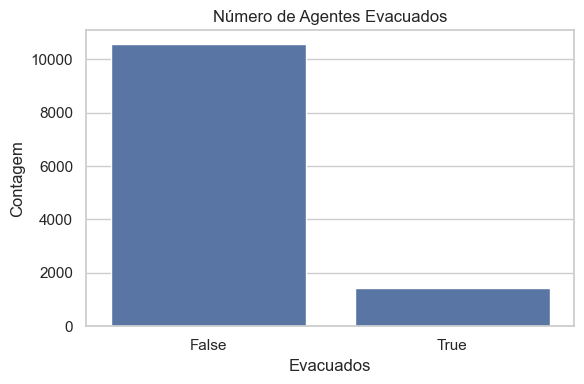

In [30]:
# 1. Histogram: evacuation status
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df_minute_1, x='evacuated', ax=ax)
ax.set(title="Número de Agentes Evacuados", xlabel="Evacuados", ylabel="Contagem")
fig.tight_layout()
fig.savefig(download_dir / "evacuated_count.png")
plt.show()
plt.close(fig)

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/30155340.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_minute_1, x='mobility_type', y='time_s', ci=None, ax=ax)


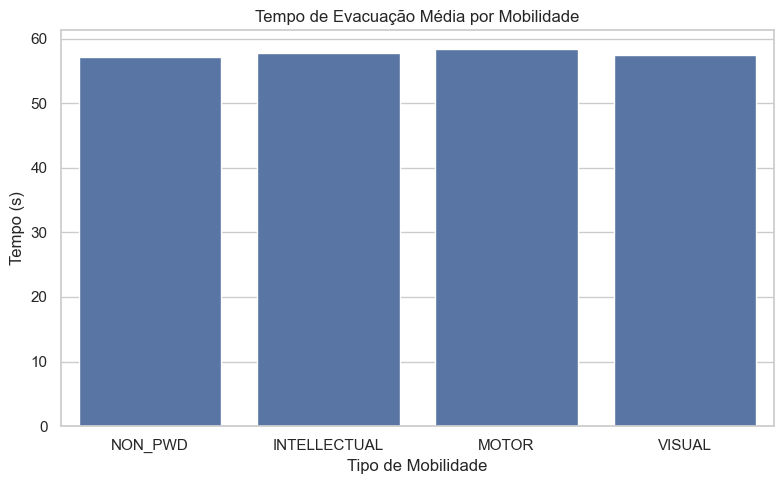

In [31]:
# 2. Average Evacuation Time by Mobility (seconds)
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=df_minute_1, x='mobility_type', y='time_s', ci=None, ax=ax)
ax.set(title="Tempo de Evacuação Média por Mobilidade", xlabel="Tipo de Mobilidade", ylabel="Tempo (s)")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "avg_time_by_mobility.png")
plt.close(fig)

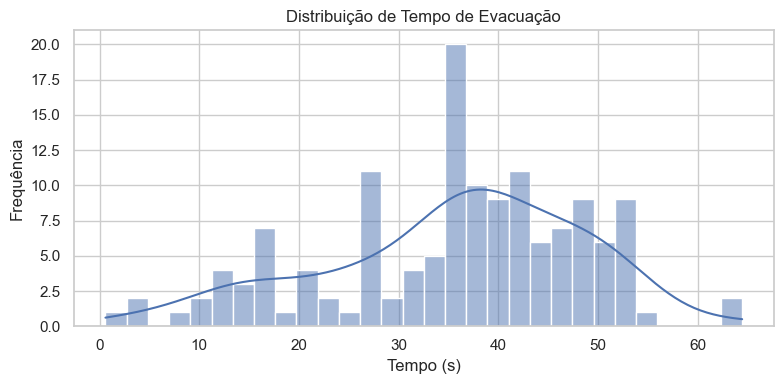

In [60]:
# 4) Distribution of Evacuation Time (histogram) *
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data=df, x='time_s', bins=30, kde=True, ax=ax)
ax.set(title="Distribuição de Tempo de Evacuação", xlabel="Tempo (s)", ylabel="Frequência")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "hist_time.png")
plt.close(fig)

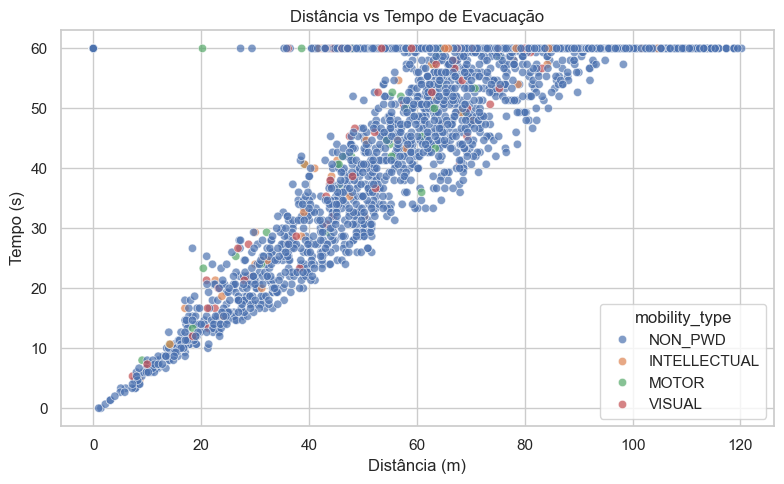

In [32]:
# 5) Distance vs. Time (scatter)
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data=df_minute_1, x='distance_m', y='time_s', hue='mobility_type', alpha=0.7, ax=ax)
ax.set(title="Distância vs Tempo de Evacuação", xlabel="Distância (m)", ylabel="Tempo (s)")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "scatter_dist_vs_time.png")
plt.close(fig)

### End of simulation

In [41]:
df_all_done = load_report_data("no_landslide/all_done", step_length, time_per_step)

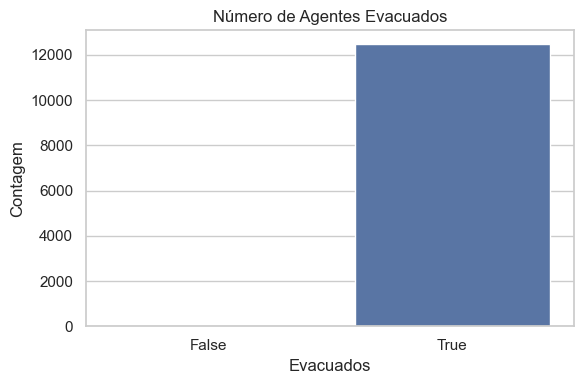

In [42]:
# 1. Histogram: evacuation status
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df_all_done, x='evacuated', ax=ax)
ax.set(title="Número de Agentes Evacuados", xlabel="Evacuados", ylabel="Contagem")
fig.tight_layout()
fig.savefig(download_dir / "evacuated_count.png")
plt.show()
plt.close(fig)

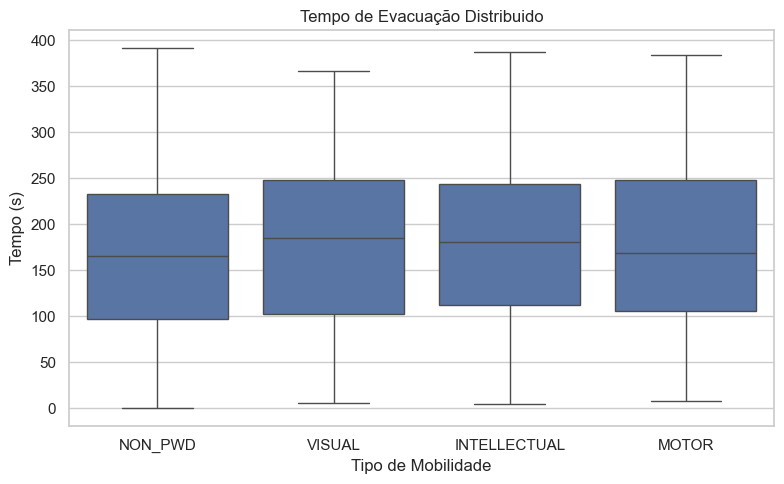

In [44]:
# 2) Evacuation Time Distribution (boxplot) **
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=df_all_done, x='mobility_type', y='time_s', ax=ax)
ax.set(title="Tempo de Evacuação Distribuido", xlabel="Tipo de Mobilidade", ylabel="Tempo (s)")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "boxplot_time.png")
plt.close(fig)

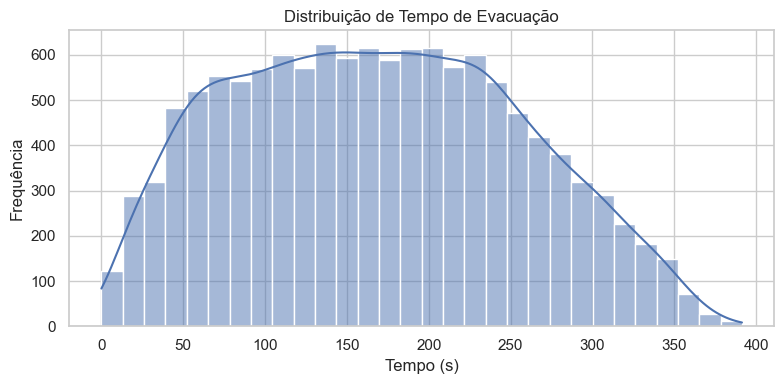

In [45]:
# 3) Distribution of Evacuation Time (histogram) *
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data=df_all_done, x='time_s', bins=30, kde=True, ax=ax)
ax.set(title="Distribuição de Tempo de Evacuação", xlabel="Tempo (s)", ylabel="Frequência")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "hist_time.png")
plt.close(fig)

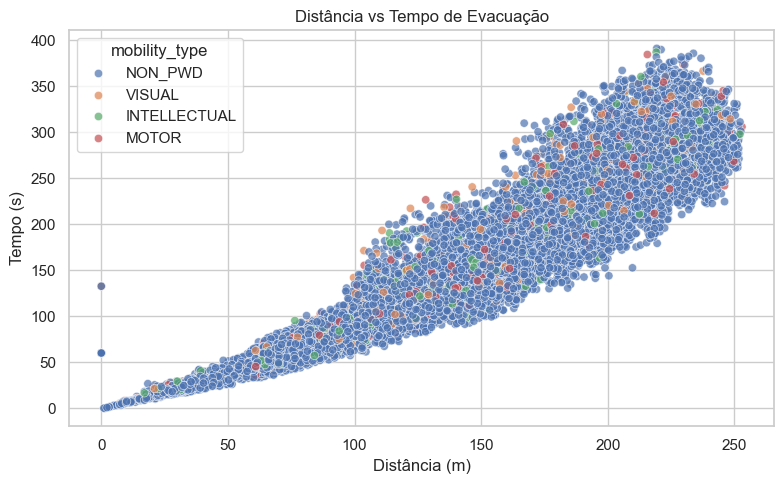

In [46]:
# 5) Distance vs. Time (scatter)
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data=df_all_done, x='distance_m', y='time_s', hue='mobility_type', alpha=0.7, ax=ax)
ax.set(title="Distância vs Tempo de Evacuação", xlabel="Distância (m)", ylabel="Tempo (s)")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "scatter_dist_vs_time.png")
plt.close(fig)

In [38]:
from pathlib import Path
import pandas as pd

report_folders = ["minute_1", "minute_3", "minute_5", "all_done"]

all_reports = {}
for folder in report_folders:
    path = Path("reports/no_landslide") / folder
    files = list(path.glob("*.csv"))
    if files:
        # Load the most recent file in each folder
        latest = max(files, key=lambda f: f.stat().st_mtime)
        all_reports[folder] = pd.read_csv(latest)

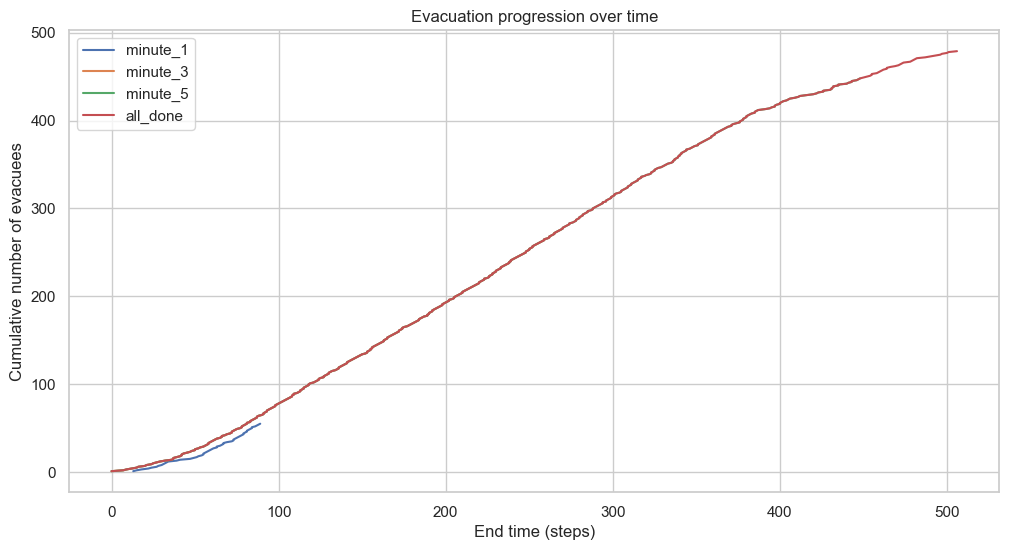

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for label, df in all_reports.items():
    completed = df[df["evacuated"] == True]
    sorted_times = completed["end_time"].sort_values().reset_index(drop=True)
    plt.plot(sorted_times, range(1, len(sorted_times)+1), label=label)

plt.xlabel("End time (steps)")
plt.ylabel("Cumulative number of evacuees")
plt.title("Evacuation progression over time")
plt.legend()
plt.grid(True)
plt.show()

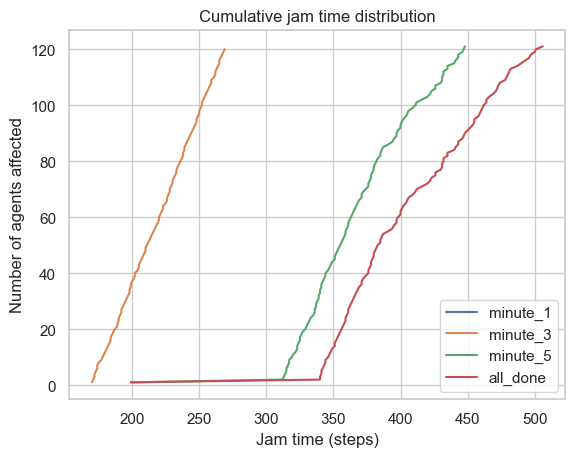

In [40]:
for label, df in all_reports.items():
    stuck_or_slow = df[(df["stuck"] == True) | (df["time_spent"] > df["time_spent"].quantile(0.75))]
    jam_times = stuck_or_slow["time_spent"].sort_values().reset_index(drop=True)
    plt.plot(jam_times, range(1, len(jam_times)+1), label=label)

plt.xlabel("Jam time (steps)")
plt.ylabel("Number of agents affected")
plt.title("Cumulative jam time distribution")
plt.legend()
plt.grid(True)
plt.show()

In [49]:
summary_time_related = df_all_done.groupby('mobility_type').agg({
    'time_s':       'mean',
    'distance_m':   'mean',
    'steps':        'mean',
    'velocity_m_s': 'mean',
    'agent_id':     'count'
}).rename(columns={'agent_id':'count_agents'})

In [54]:
summary_time_related

,time_s,distance_m,steps,velocity_m_s,count_agents
mobility_type,,,,,
INTELLECTUAL,178.721014,155.281066,139.605978,0.952700,368
MOTOR,177.683060,153.677635,136.959016,0.945000,366
NON_PWD,167.577799,151.986213,135.678688,inf,11369
VISUAL,178.503979,153.515882,136.159151,0.951081,377


In [55]:
total_agents = len(df_all_done)
evacuated_count = df_all_done['evacuated'].sum()
not_evacuated_count = total_agents - evacuated_count
impacted_count = df_all_done['impacted_by_landslide'].sum()
not_impacted_count = total_agents - impacted_count

In [56]:
summary_evacuation = pd.DataFrame({
    'metric': [
        'total_agents',
        'evacuated',
        'not_evacuated',
        'impacted_by_landslide',
        'not_impacted_by_landslide'
    ],
    'count': [
        total_agents,
        evacuated_count,
        not_evacuated_count,
        impacted_count,
        not_impacted_count
    ]
})

In [57]:
summary_evacuation

,metric,count
0,total_agents,12480
1,evacuated,12464
2,not_evacuated,16
3,impacted_by_landslide,0
4,not_impacted_by_landslide,12480


## One risk area

### 1 minute

In [61]:
df_one_risk_area_minute_1 = load_report_data("one_risk_area/minute_1", step_length, time_per_step)

In [ ]:
# 1. Histogram: evacuation status
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df_minute_1, x='evacuated', ax=ax)
ax.set(title="Número de Agentes Evacuados", xlabel="Evacuados", ylabel="Contagem")
fig.tight_layout()
fig.savefig(download_dir / "evacuated_count.png")
plt.show()
plt.close(fig)

In [ ]:
# 2) Evacuation Time Distribution (boxplot) **
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=df_all_done, x='mobility_type', y='time_s', ax=ax)
ax.set(title="Tempo de Evacuação Distribuido", xlabel="Tipo de Mobilidade", ylabel="Tempo (s)")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "boxplot_time.png")
plt.close(fig)

In [ ]:
# 3) Distribution of Evacuation Time (histogram) *
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data=df_all_done, x='time_s', bins=30, kde=True, ax=ax)
ax.set(title="Distribuição de Tempo de Evacuação", xlabel="Tempo (s)", ylabel="Frequência")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "hist_time.png")
plt.close(fig)

In [ ]:
# 6) Evacuation Count by Landslide Impact (hue)
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df, x='evacuated', hue='impacted_by_landslide', ax=ax)
ax.set(title="Agents Evacuated by Landslide Impact",
       xlabel="Evacuated", ylabel="Count")
ax.legend(title="Impacted by Landslide")
fig.tight_layout()
fig.savefig(download_dir / "evacuated_by_landslide_hue.png")
plt.show()
plt.close(fig)

### 3 minutes

In [ ]:
# 1. Histogram: evacuation status
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df_minute_1, x='evacuated', ax=ax)
ax.set(title="Número de Agentes Evacuados", xlabel="Evacuados", ylabel="Contagem")
fig.tight_layout()
fig.savefig(download_dir / "evacuated_count.png")
plt.show()
plt.close(fig)

In [ ]:
# 2) Evacuation Time Distribution (boxplot) **
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=df_all_done, x='mobility_type', y='time_s', ax=ax)
ax.set(title="Tempo de Evacuação Distribuido", xlabel="Tipo de Mobilidade", ylabel="Tempo (s)")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "boxplot_time.png")
plt.close(fig)

In [ ]:
# 3) Distribution of Evacuation Time (histogram) *
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data=df_all_done, x='time_s', bins=30, kde=True, ax=ax)
ax.set(title="Distribuição de Tempo de Evacuação", xlabel="Tempo (s)", ylabel="Frequência")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "hist_time.png")
plt.close(fig)

In [ ]:
# 6) Evacuation Count by Landslide Impact (hue)
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df, x='evacuated', hue='impacted_by_landslide', ax=ax)
ax.set(title="Agents Evacuated by Landslide Impact",
       xlabel="Evacuated", ylabel="Count")
ax.legend(title="Impacted by Landslide")
fig.tight_layout()
fig.savefig(download_dir / "evacuated_by_landslide_hue.png")
plt.show()
plt.close(fig)

### 5 minutes

In [ ]:
# 1. Histogram: evacuation status
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df_minute_1, x='evacuated', ax=ax)
ax.set(title="Número de Agentes Evacuados", xlabel="Evacuados", ylabel="Contagem")
fig.tight_layout()
fig.savefig(download_dir / "evacuated_count.png")
plt.show()
plt.close(fig)

In [ ]:
# 2) Evacuation Time Distribution (boxplot) **
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=df_all_done, x='mobility_type', y='time_s', ax=ax)
ax.set(title="Tempo de Evacuação Distribuido", xlabel="Tipo de Mobilidade", ylabel="Tempo (s)")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "boxplot_time.png")
plt.close(fig)

In [ ]:
# 3) Distribution of Evacuation Time (histogram) *
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data=df_all_done, x='time_s', bins=30, kde=True, ax=ax)
ax.set(title="Distribuição de Tempo de Evacuação", xlabel="Tempo (s)", ylabel="Frequência")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "hist_time.png")
plt.close(fig)

In [ ]:
# 6) Evacuation Count by Landslide Impact (hue)
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df, x='evacuated', hue='impacted_by_landslide', ax=ax)
ax.set(title="Agents Evacuated by Landslide Impact",
       xlabel="Evacuated", ylabel="Count")
ax.legend(title="Impacted by Landslide")
fig.tight_layout()
fig.savefig(download_dir / "evacuated_by_landslide_hue.png")
plt.show()
plt.close(fig)

### End of simulation

In [70]:
df_one_risk_area_all_done = load_report_data("one_risk_area/all_done", step_length, time_per_step)

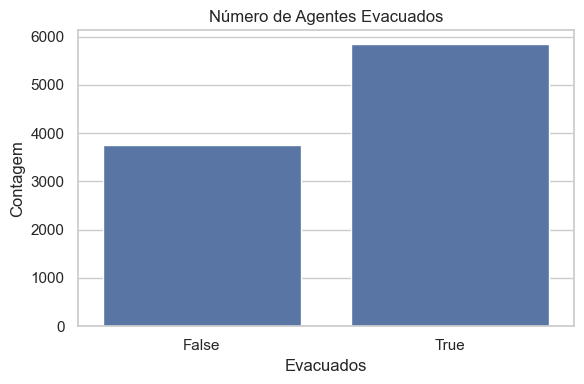

In [71]:
# 1. Histogram: evacuation status
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df_one_risk_area_all_done, x='evacuated', ax=ax)
ax.set(title="Número de Agentes Evacuados", xlabel="Evacuados", ylabel="Contagem")
fig.tight_layout()
fig.savefig(download_dir / "evacuated_count.png")
plt.show()
plt.close(fig)

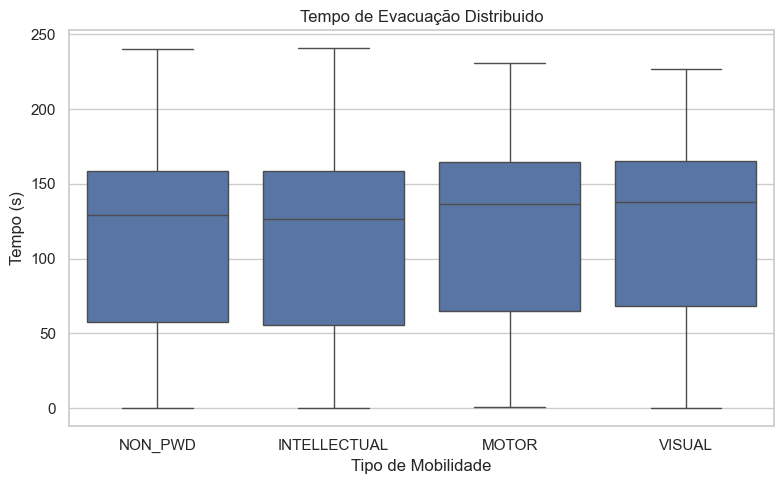

In [72]:
# 2) Evacuation Time Distribution (boxplot) **
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=df_one_risk_area_all_done, x='mobility_type', y='time_s', ax=ax)
ax.set(title="Tempo de Evacuação Distribuido", xlabel="Tipo de Mobilidade", ylabel="Tempo (s)")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "boxplot_time.png")
plt.close(fig)

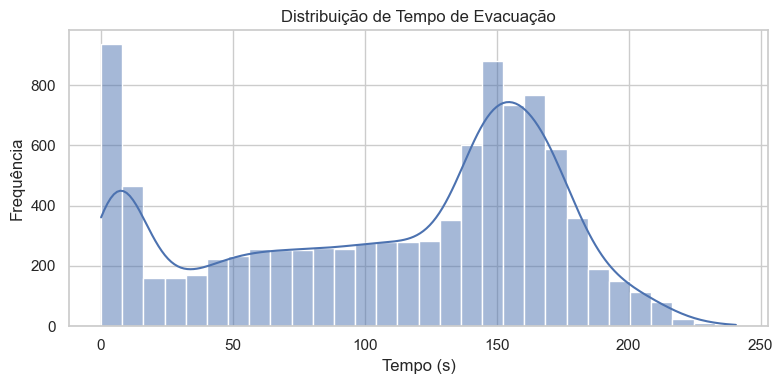

In [73]:
# 3) Distribution of Evacuation Time (histogram) *
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data=df_one_risk_area_all_done, x='time_s', bins=30, kde=True, ax=ax)
ax.set(title="Distribuição de Tempo de Evacuação", xlabel="Tempo (s)", ylabel="Frequência")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "hist_time.png")
plt.close(fig)

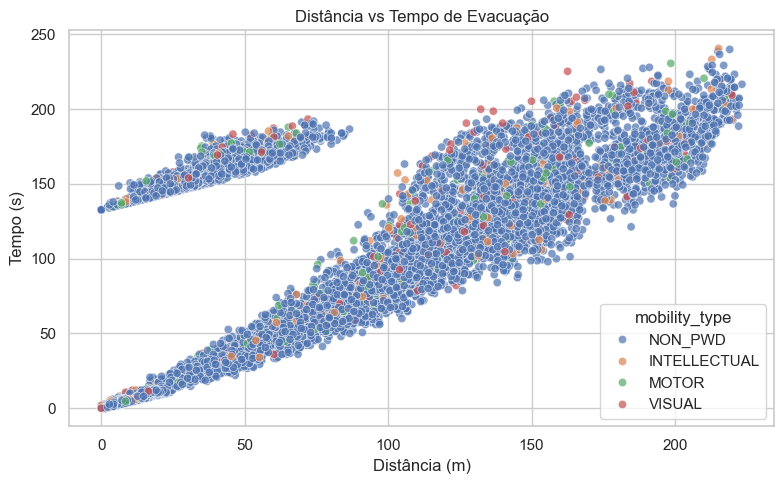

In [74]:
# 5) Distance vs. Time (scatter)
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data=df_one_risk_area_all_done, x='distance_m', y='time_s', hue='mobility_type', alpha=0.7, ax=ax)
ax.set(title="Distância vs Tempo de Evacuação", xlabel="Distância (m)", ylabel="Tempo (s)")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "scatter_dist_vs_time.png")
plt.close(fig)

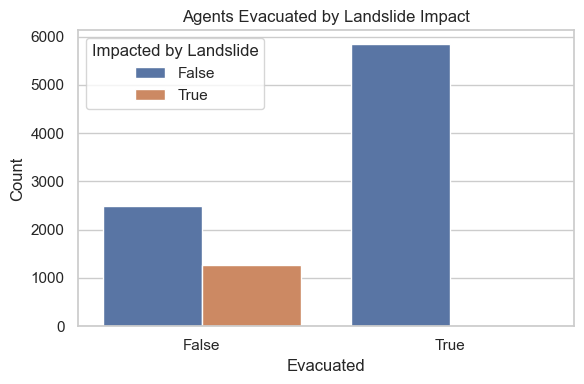

In [76]:
# 6) Evacuation Count by Landslide Impact (hue)
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df_one_risk_area_all_done, x='evacuated', hue='impacted_by_landslide', ax=ax)
ax.set(title="Agents Evacuated by Landslide Impact",
       xlabel="Evacuated", ylabel="Count")
ax.legend(title="Impacted by Landslide")
fig.tight_layout()
fig.savefig(download_dir / "evacuated_by_landslide_hue.png")
plt.show()
plt.close(fig)

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/3011625308.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


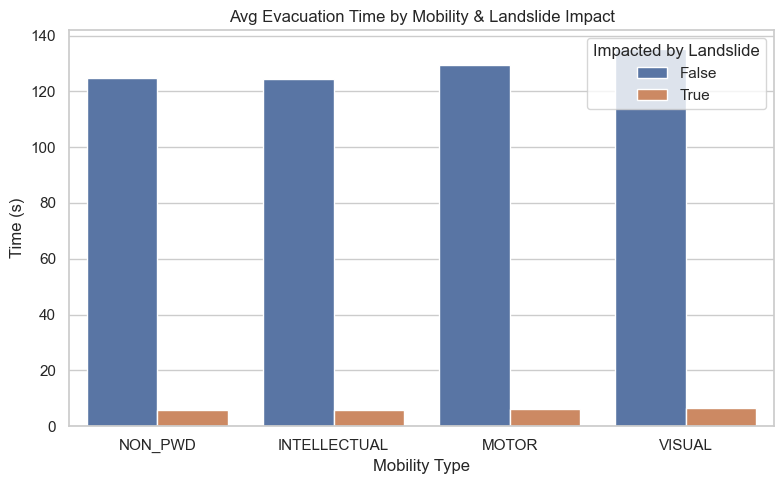

In [77]:
# 7) Average Evacuation Time by Mobility & Landslide Impact
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(
    data=df_one_risk_area_all_done, x='mobility_type', y='time_s',
    hue='impacted_by_landslide', ci=None, ax=ax
)
ax.set(title="Avg Evacuation Time by Mobility & Landslide Impact",
       xlabel="Mobility Type", ylabel="Time (s)")
ax.legend(title="Impacted by Landslide")
fig.tight_layout()
fig.savefig(download_dir / "avg_time_by_landslide.png")
plt.show()
plt.close(fig)

In [78]:
summary_time_related = df_one_risk_area_all_done.groupby('mobility_type').agg({
    'time_s':       'mean',
    'distance_m':   'mean',
    'steps':        'mean',
    'velocity_m_s': 'mean',
    'agent_id':     'count'
}).rename(columns={'agent_id':'count_agents'})

In [80]:
summary_time_related

,time_s,distance_m,steps,velocity_m_s,count_agents
mobility_type,,,,,
INTELLECTUAL,108.205817,84.325415,77.144295,inf,298
MOTOR,113.057387,79.269886,72.128205,0.906808,273
NON_PWD,109.269029,83.797171,76.015771,inf,8750
VISUAL,114.853047,84.260881,76.473118,inf,279


In [84]:
total_agents = len(df_one_risk_area_all_done)
evacuated_count = df_one_risk_area_all_done['evacuated'].sum()
not_evacuated_count = total_agents - evacuated_count
impacted_count = df_one_risk_area_all_done['impacted_by_landslide'].sum()
not_impacted_count = total_agents - impacted_count

In [85]:
summary_evacuation = pd.DataFrame({
    'metric': [
        'total_agents',
        'evacuated',
        'not_evacuated',
        'impacted_by_landslide',
        'not_impacted_by_landslide'
    ],
    'count': [
        total_agents,
        evacuated_count,
        not_evacuated_count,
        impacted_count,
        not_impacted_count
    ]
})

In [86]:
summary_evacuation

,metric,count
0,total_agents,9600
1,evacuated,5836
2,not_evacuated,3764
3,impacted_by_landslide,1266
4,not_impacted_by_landslide,8334


# Visual of the elevation

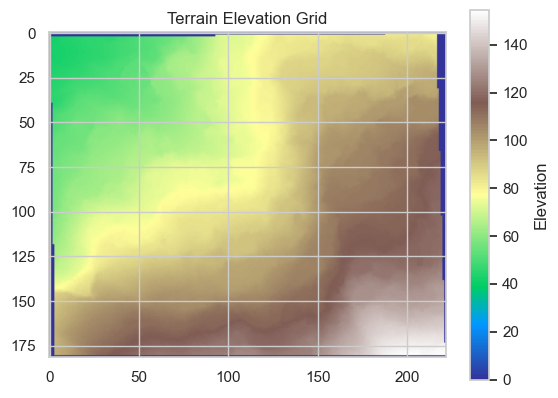

In [58]:
import numpy as np
import matplotlib.pyplot as plt

elev = np.load("data/processed/elevation.npy")
plt.imshow(elev, cmap="terrain")
plt.colorbar(label="Elevation")
plt.title("Terrain Elevation Grid")
plt.show()